#Добро пожаловать на задание уровня Ultra Pro.

В данном задании требуется на базе клеток сделать задачу сегментации с вниманием.

Хотелось бы отметить что данное задание является сложным и Вам потребуется самостоятельно разобраться как правильно включить блок внимания в задачу сегментации.


Успехов!

In [ ]:
# Загрузить библиотеку OpenCV для загрузки файлов
import cv2

# Загрузим библиотеку Numpy
import numpy as np

# # Импортируем модель для загрузки файлов
from glob import glob

# Подключим библиотеку для визуализации данных
from matplotlib import pylab as plt

# Импортируем слои
from keras.layers import Conv2D, BatchNormalization, Activation, Dropout, UpSampling2D, Add, Multiply, Input, Concatenate, MaxPooling2D

# Импортируем Model
from keras.models import Model

# Импортируем оптимизатор
from tensorflow.keras.optimizers import Adam

# Импортируем backend keras
from keras import backend as K

# Подключаем диск
import gdown

In [ ]:
# Подключаем диск
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/advanced/l4/cellbase.zip', None, quiet=True)

'cellbase.zip'

In [ ]:
# Распаковываем zip-файл базы
!unzip -o 'cellbase.zip'

Archive:  cellbase.zip
   creating: label/
  inflating: label/0.tif             
  inflating: label/1.tif             
  inflating: label/10.tif            
  inflating: label/11.tif            
  inflating: label/12.tif            
  inflating: label/13.tif            
  inflating: label/14.tif            
  inflating: label/15.tif            
  inflating: label/16.tif            
  inflating: label/17.tif            
  inflating: label/18.tif            
  inflating: label/19.tif            
  inflating: label/2.tif             
  inflating: label/20.tif            
  inflating: label/21.tif            
  inflating: label/22.tif            
  inflating: label/23.tif            
  inflating: label/24.tif            
  inflating: label/25.tif            
  inflating: label/26.tif            
  inflating: label/27.tif            
  inflating: label/28.tif            
  inflating: label/29.tif            
  inflating: label/3.tif             
  inflating: label/4.tif             
  infla

In [ ]:
def load_train():
  '''
  Функция для загрузки обучающей выборки (изображения и их разметка)

  Args:
    None

  Returns:
    train_images, train_labels - нормированные массивы решейпленных изображений
  '''
  path1 = sorted(glob('/content/train/*'))                                      #  Просмтриваем все файлы по пути /content/train/, сохраняем их пути и соритруем
  path2 = sorted(glob('/content/label/*'))                                      #  Просмтриваем все файлы по пути /content/label/, сохраняем их пути и соритруем
  
  train_images = []                                                             #  Создаем список для изображений
  train_labels = []                                                             #  Создаем список для масок
  for filename1,filename2 in zip(path1, path2):                                 #  Создаем цикл по всем элементам в списках путей
    img1 = cv2.imread(filename1, 0)                                             #  Загружаем файлы из папки с изображениями для обучения (Параметр 0 указываем для загрузки изображений в ЧБ формате)
    img2 = cv2.imread(filename2, 0)                                             #  Загружаем файлы из папки с разметкой для обучени  (Параметр 0 указываем для загрузки изображений в ЧБ формате)
    img1 = img1.reshape(512, 512, 1)                                            #  Меняем размеры изображения в (512, 512, 1)
    img2 = img2.reshape(512, 512, 1)                                            #  Меняем размеры разметки в (512, 512, 1)
    train_images.append(img1)                                                   #  Сохраняем в список изображений
    train_labels.append(img2)                                                   #  Сохраняем в список разметки
    
  train_images = np.array(train_images)/255                                     #  Нормируем изображения и сохраняем в Numpy массив
  train_labels = np.array(train_labels)/255                                     #  Нормируем разметку и сохраняем в Numpy массив
  
  return train_images,train_labels                                              #  Возвращаем массивы изображения и разметки

In [ ]:
train_images,train_labels = load_train()                                        #  Загружаем изображения и разметку
print(train_images.shape)                                                       #  Смотрим на размерность массива изображений

(30, 512, 512, 1)


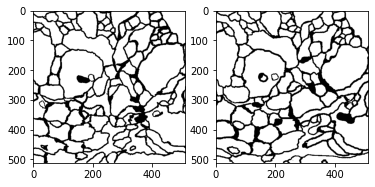

In [ ]:
fig = plt.figure()                                                              #  Создаем новую фигруру
for i in range(2):                                                              #  Цикл по 2 элементам для отображения 2 картинок
  plt.subplot(1, 2, i+1)                                                        #  Создаем subplot
  plt.imshow(train_labels[i].reshape(512, 512),cmap='gray')                     #  Выводим разметки, предварительно сделав решейп в (512, 512) и указав ЧБ цвет

In [ ]:
def load_test(batch_size):
  '''
  Функция для загрузки тестовой выборки (только изображения)

  Args:
    batch_size - количество изображений, которые нужно загрузить

  Returns:
    train_images - нормированный массив решейпленных изображений
  '''
  path = glob('/content/test/*')                                                #  Просмтриваем все файлы по пути /content/test/, сохраняем их пути и соритруем
  batch = np.random.choice(path, size = batch_size)                             #  Случайным образом выбираем элементы в количестве batch_size из списка path
  test_images = []                                                              #  Создаем список для изображений
  for filename in batch:                                                        #  Список по всем случайно выбранным путям
    img = cv2.imread(filename, 0)                                               #  Загружаем файлы из папки с изображениями для теста (Параметр 0 указываем для загрузки изображений в ЧБ формате)
    img = img.reshape(512, 512, 1)                                              #  Меняем размеры изображения в (512, 512, 1)
    test_images.append(img)                                                     #  Сохраняем в список изображений
  
  test_images = np.array(test_images)/255                                       #  Нормируем изображения и сохраняем в Numpy массив
  
  return test_images                                                            #  Возвращаем массив изображений

In [ ]:
test_samples = 2                                                                #  Создаем переменную под количество изображений для теста
                                                                                #  Обратите внимание, что значение в переменной может быть больше, чем количество изображений
                                                                                #  В таком случае в загруженном массиве изображений у Вас будут повторяющиеся изображения
test_images = load_test(test_samples)                                           #  Загружаем изображения в количестве test_samples
print(test_images.shape)                                                        #  Смотрим на размерность массива изображений

(2, 512, 512, 1)


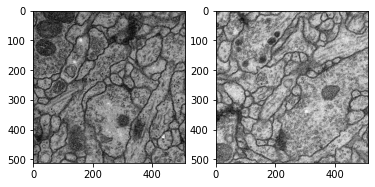

In [ ]:
fig = plt.figure()                                                              #  Создаем новую фигруру
for i in range(test_samples):                                                   #  Цикл по элементам в количестве test_samples для отображения картинок
  plt.subplot(1, test_samples, i+1)                                             #  Создаем subplot
  plt.imshow(test_images[i].reshape(512, 512),cmap='gray')                      #  Выводим разметки, предварительно сделав решейп в (512, 512) и указав ЧБ цвет

In [ ]:
class Attention_UNet():                                                         #  Определяем класс для создания нейронки. Будем реализовывать сеть U-Net с вниманием
  '''
  Класс для создания сети с вниманием
  '''
  def __init__(self,img_rows = 512, img_cols = 512):
    '''
    Конструктор класса

    Args:
      img_rows, img_cols - размеры входящих изображений

    Returns:
      None
    '''
    self.img_rows = img_rows                                                    #  Изменение ширины изображения (при необходимости)
    self.img_cols = img_cols                                                    #  Изменение высоты изображения (при необходимости)
    self.img_shape = (self.img_rows, self.img_cols, 1)                          #  В переменную img_shape сохраняем размеры изображения с каналом
    self.df = 64                                                                #  Количество фильтров в сверточных слоях
    self.uf = 64                                                                #  Количество фильтров в разверточных слоях
    
  def Build_UNet(self):
    '''
    Функция создания сети

    Args:
      self - переменные и функции, объявленные в классе

    Returns:
      model - возвращает созданную архитектуру сети
    '''

    def conv2d(layer_input, filters, dropout_rate = 0, bn = False):
      '''
      Функция создания блока сверточных слоев

      Args:
        layer_input - входной слой, который продолжим обрабатывать
        filters - количество фильтров для свертки
        dropout_rate - процент отброса данных при необходимости
        bn - булевая переменная, отвечающая за добавления слоя BatchNormalization()

      Returns:
        Слой сети после обработки в данном блоке
      '''

      layer = Conv2D(filters, (3,3), (1,1), padding = 'same')(layer_input)      #  Создаем сверточный слой с количеством фильтров filters, kernel (3,3), stride (1,1) и padding = 'same' 
      if bn:                                                                    #  Условие добавления BatchNormalization() 
        layer = BatchNormalization()(layer)                                     #  Добавление BatchNormalization()
      layer = Activation('relu')(layer)                                         #  Добавление слоя Activation('relu')
      
      layer = Conv2D(filters, (3,3), (1,1), padding = 'same')(layer)            #  Создаем сверточный слой с количеством фильтров filters, kernel (3,3), stride (1,1) и padding = 'same'
      if bn:                                                                    #  Условие добавления BatchNormalization()
        layer = BatchNormalization()(layer)                                     #  Добавление BatchNormalization()
      layer = Activation('relu')(layer)                                         #  Добавление слоя Activation('relu')
      
      if dropout_rate:                                                          #  Условие добавления Dropout()
        layer = Dropout(dropout_rate)(layer)                                    #  Добавление Dropout()
      
      return layer                                                              #  Возвращаем слой после обработки
    
    def deconv2d(layer_input, filters, bn = False):
      '''
      Функция создания блока разверточных слоев

      Args:
        layer_input - входной слой, который продолжим обрабатывать
        filters - количество фильтров для свертки
        bn - булевая переменная, отвечающая за добавления слоя BatchNormalization()

      Returns:
        Слой сети после обработки в данном блоке
      '''
      
      layer = UpSampling2D((2,2))(layer_input)                                  #  Разворачиваем изображение в 2 раза
      layer = Conv2D(filters, (3,3), (1,1), padding = 'same')(layer)            #  Создаем сверточный слой с количеством фильтров filters, kernel (3,3), stride (1,1) и padding = 'same'
      if bn:                                                                    #  Условие добавления BatchNormalization()
        layer = BatchNormalization()(layer)                                     #  Добавление BatchNormalization()
      layer = Activation('relu')(layer)                                         #  Добавление слоя Activation('relu')
      
      return layer                                                              #  Возвращаем слой после обработки
    
    def attention_block(layer_up, layer_conv, filters, bn = False):
      '''
      Функция создания блока внимания

      Args:
        layer_up - входной слой, который продолжим обрабатывать
        layer_conv - количество фильтров для свертки
        filters - процент отброса данных при необходимости
        bn - булевая переменная, отвечающая за добавления слоя BatchNormalization()

      Returns:
        Слой сети после обработки в данном блоке
      '''

      layer_1 = Conv2D(filters, (1,1), (1,1), padding = 'valid')(layer_up)      #  Создаем сверточный слой с количеством фильтров filters, kernel (1,1), stride (1,1) и padding = 'valid'
      if bn:                                                                    #  Условие добавления BatchNormalization()
        layer_1 = BatchNormalization()(layer_1)                                 #  Добавление BatchNormalization()
      layer_2 = Conv2D(filters, (1,1), (1,1), padding='valid')(layer_conv)      #  Создаем сверточный слой с количеством фильтров filters, kernel (1,1), stride (1,1) и padding = 'valid'
      if bn:                                                                    #  Условие добавления BatchNormalization()
        layer_2 = BatchNormalization()(layer_2)                                 #  Добавление BatchNormalization()
      layer_final = Add()([layer_1,layer_2])                                    #  Сложим 2 слоя
      layer_final = Activation('relu')(layer_final)                             #  Добавление слоя Activation('relu')
      
      layer_final = Conv2D(1, (1,1), (1,1), padding = 'valid')(layer_final)     #  Создаем сверточный слой с количеством фильтров 1, kernel (1,1), stride (1,1) и padding = 'valid'
      
      if bn:                                                                    #  Условие добавления BatchNormalization()
        layer_final = BatchNormalization()(layer_final)                         #  Добавление BatchNormalization()
      layer_final = Activation('sigmoid')(layer_final)                          #  Добавление слоя Activation('sigmoid')
      
      return Multiply()([layer_conv, layer_final])                              #  Перемножим 2 слоя
    
    inputs = Input(shape = self.img_shape)                                      #  Задаем входную размерность
    
    conv1 = conv2d(inputs, self.df)                                             #  Используем сверточный блок на слое inputs на количество фильтров df
    pool1 = MaxPooling2D((2,2))(conv1)                                          #  Применяем MaxPooling2D с ядром (2, 2)
    
    conv2 = conv2d(pool1, self.df*2, bn=True)                                   #  Используем сверточный блок на слое pool1 на количество фильтров df*2 с BatchNormalization()
    pool2 = MaxPooling2D((2,2))(conv2)                                          #  Применяем MaxPooling2D с ядром (2, 2)
    
    conv3 = conv2d(pool2, self.df*4, bn=True)                                   #  Используем сверточный блок на слое pool2 на количество фильтров df*4 с BatchNormalization()                                   
    pool3 = MaxPooling2D((2,2))(conv3)                                          #  Применяем MaxPooling2D с ядром (2, 2)
    
    conv4 = conv2d(pool3, self.df*8, dropout_rate=0.5, bn=True)                 #  Используем сверточный блок на слое pool3 на количество фильтров df*8 с BatchNormalization() и Dropout(0.5)
    pool4 = MaxPooling2D((2,2))(conv4)                                          #  Применяем MaxPooling2D с ядром (2, 2)
    
    conv5 = conv2d(pool4, self.df*16, dropout_rate=0.5, bn=True)                #  Используем сверточный блок на слое pool4 на количество фильтров df*16 с BatchNormalization() и Dropout(0.5)
    
    up6 = deconv2d(conv5, self.uf*8, bn=True)                                   #  Используем разверточный блок на слое conv5 на количество фильтров uf*8 с BatchNormalization()
    conv6 = attention_block(up6, conv4, self.uf*8, bn=True)                     #  Применяем блок внимания на слоях up6, conv4 с фильтрами uf*8 и BacthNormalization()
    up6 = Concatenate()([up6, conv6])                                           #  Соединяем слои up6 и conv6
    conv6 = conv2d(up6, self.uf*8)                                              #  Применяем сверточный блок на слое up6 с фильтрами uf*8
    
    up7 = deconv2d(conv6, self.uf*4, bn=True)                                   #  Используем разверточный блок на слое conv6 на количество фильтров uf*4 с BatchNormalization()
    conv7 = attention_block(up7, conv3, self.uf*4, bn=True)                     #  Применяем блок внимания на слоях up7, conv3 с фильтрами uf*4 и BacthNormalization()
    up7 = Concatenate()([up7, conv7])                                           #  Соединяем слои up7 и conv7
    conv7 = conv2d(up7, self.uf*4)                                              #  Применяем сверточный блок на слое up7 с фильтрами uf*4
    
    up8 = deconv2d(conv7, self.uf*2, bn=True)                                   #  Используем разверточный блок на слое conv7 на количество фильтров uf*2 с BatchNormalization()
    conv8 = attention_block(up8, conv2, self.uf*2, bn=True)                     #  Применяем блок внимания на слоях up8, conv2 с фильтрами uf*2 и BacthNormalization()
    up8 = Concatenate()([up8, conv8])                                           #  Соединяем слои up8 и conv8
    conv8 = conv2d(up8, self.uf*2)                                              #  Применяем сверточный блок на слое up8 с фильтрами uf*2
    
    up9 = deconv2d(conv8, self.uf, bn=True)                                     #  Используем разверточный блок на слое conv8 на количество фильтров uf с BatchNormalization()
    conv9 = attention_block(up9, conv1, self.uf, bn=True)                       #  Применяем блок внимания на слоях up9, conv1 с фильтрами uf и BacthNormalization()
    up9 = Concatenate()([up9, conv9])                                           #  Соединяем слои up9 и conv9
    conv9 = conv2d(up9, self.uf)                                                #  Применяем сверточный блок на слое up9 с фильтрами uf
    
    outputs = Conv2D(1, (1,1), (1,1), activation='sigmoid')(conv9)              #  Применяем сверточный блок на 1 фильтр с kernel (1,1), stride (1,1) и функцией активации 'sigmoid'
    
    model = Model(inputs=  inputs, outputs = outputs)                           #  Собираем модель с входом inputs и выходом outputs
    
    return model

In [ ]:
Net = Attention_UNet()                                                          #  Создаем экземпляр класса Attention_UNet
UNet = Net.Build_UNet()                                                         #  Применяем метод создания модели
UNet.summary()                                                                  #  При необохимости выводим summary модели

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 512, 512, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
def dice_coef_loss(y_true, y_pred):
  '''
  Функция подсчета ошибки

  Args:
    y_true - истинное значение
    y_pred - предсказанное значение
  
  Returns:
    Возвращает ошибку, посчитанную по формуле расчета Dice Loss
  '''
  y_true_f = K.flatten(y_true)                                                  #  Выравниваем все в одномерный массив
  y_pred_f = K.flatten(y_pred)                                                  #  Выравниваем все в одномерный массив
  intersection = K.sum(y_true_f * y_pred_f)                                     #  Считаем пересечение (для большего понимания советуем посмотреть что такое Dice Loss)
  return 1 - (2 * intersection)/(K.sum(y_true_f * y_true_f) + K.sum(y_pred_f * y_pred_f))

In [ ]:
#  Компилируем модель, указывая ошибку, оптимизатора вместе с шагом обучения и метрику
UNet.compile(loss = dice_coef_loss,
             optimizer = Adam(1e-4),
             metrics = ['accuracy'])

In [ ]:
#  Запускаем обучение
UNet.fit(train_images,                                                          #  Данные для обучения
         train_labels,                                                          #  Ответы для обученя
         validation_split = 0.1,                                                #  Коэффициент разделения выборки для валидации
         batch_size = 1,                                                        #  Размер батча
         epochs = 20,                                                           #  Количество эпох
         verbose = 1,                                                           #  Хотим выводить информацию при обучении
         shuffle = True)                                                        #  Перемешаем данные

Epoch 1/20
27/27 [==============================] - 20s 223ms/step - loss: 0.0792 - accuracy: 0.8442 - val_loss: 0.1530 - val_accuracy: 0.7663
Epoch 2/20
27/27 [==============================] - 5s 203ms/step - loss: 0.0482 - accuracy: 0.8996 - val_loss: 0.1238 - val_accuracy: 0.7663
Epoch 3/20
27/27 [==============================] - 5s 202ms/step - loss: 0.0417 - accuracy: 0.9122 - val_loss: 0.1228 - val_accuracy: 0.7663
Epoch 4/20
27/27 [==============================] - 6s 208ms/step - loss: 0.0380 - accuracy: 0.9198 - val_loss: 0.1265 - val_accuracy: 0.7663
Epoch 5/20
27/27 [==============================] - 5s 202ms/step - loss: 0.0358 - accuracy: 0.9250 - val_loss: 0.1248 - val_accuracy: 0.7663
Epoch 6/20
27/27 [==============================] - 5s 202ms/step - loss: 0.0344 - accuracy: 0.9277 - val_loss: 0.1261 - val_accuracy: 0.7663
Epoch 7/20
27/27 [==============================] - 5s 202ms/step - loss: 0.0330 - accuracy: 0.9307 - val_loss: 0.1229 - val_accuracy: 0.7663
Epoch

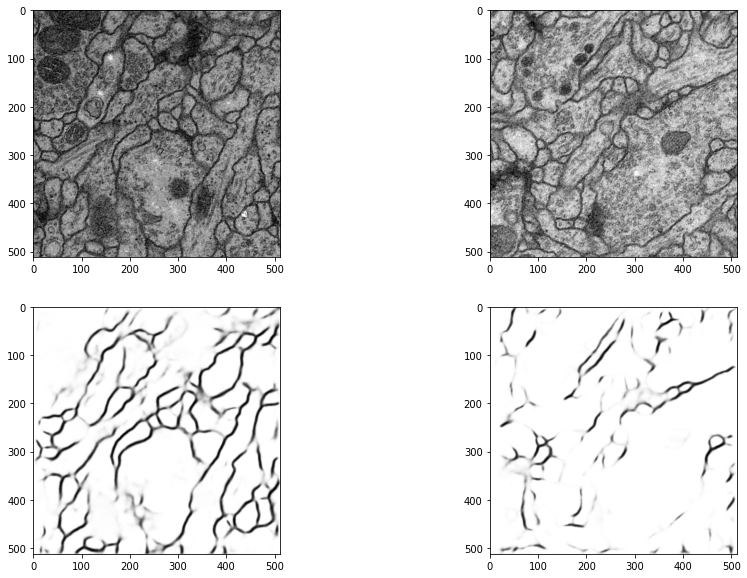

In [ ]:
result = UNet.predict(test_images[0:2])                                         #  Предсказываем значения
fig = plt.figure(figsize=(15,10))                                                #  Создаем фигуру
for i in range(2):                                                              #  Цикл по колчеству картинку в пердсказнии
  plt.subplot(2, 2, i+1)                                                        #  Создаем subplot
  plt.imshow(test_images[i].reshape(512, 512), cmap='gray')                     #  Выводим изображения из теста
  plt.subplot(2, 2, i+3)                                                        #  Создаем subplot
  plt.imshow(result[i].reshape(512, 512), cmap='gray')                          #  Выводим предсказания для изображения теста

Полученный результат безусловно не идеален, но полученное значение dice_koef позволяет сделать вывод о перспективности данного подхода для решения поставленной задачи